In [5]:
import pandas as pd
import sys
import os

In [94]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
sys.path

['/Users/nehamangal/GitHub/Data Mask - Take Home Challenges/data_mask_take_home_challenges/ML Questions/Prob2',
 '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/Users/nehamangal/.ipython']

In [16]:
test_data = pd.read_csv('/Users/nehamangal/GitHub/Data Mask - Take Home Challenges/data_mask_take_home_challenges/ML Questions/Prob2/Translation_Test/test_table.csv')

In [17]:
test_data.head(n=10)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0


In [19]:
test_data.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [23]:
user_data = pd.read_csv('/Users/nehamangal/GitHub/Data Mask - Take Home Challenges/data_mask_take_home_challenges/ML Questions/Prob2/Translation_Test/user_table.csv')

In [24]:
user_data.head(n=10)

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain
5,62371,M,29,Ecuador
6,987967,M,31,Spain
7,499510,F,29,Paraguay
8,364726,F,29,Colombia
9,572551,M,21,Bolivia


In [25]:
user_data.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [27]:
?pd.merge

In [59]:
data = pd.merge(test_data, user_data, on = 'user_id', how = 'outer', indicator = True)

In [68]:
data = data.sort_values(by = ['user_id'], ignore_index = True)

In [69]:
data

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,_merge
0,1,2015-12-02,SEO,Web,EN,NaN,Chrome,0,0,M,38.0,Chile,both
1,2,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0,M,27.0,Colombia,both
2,3,2015-12-03,SEO,Mobile,ES,NaN,Iphone_App,0,1,M,18.0,Guatemala,both
3,5,2015-11-30,Ads,Web,ES,Facebook,Chrome,0,1,M,22.0,Argentina,both
4,8,2015-12-03,Ads,Mobile,ES,Google,Android_App,0,1,M,19.0,Venezuela,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453316,999993,2015-12-03,Ads,Web,ES,Yahoo,Chrome,0,0,M,30.0,Venezuela,both
453317,999996,2015-12-02,Direct,Mobile,EN,NaN,Iphone_App,0,0,M,28.0,Costa Rica,both
453318,999998,2015-12-03,Direct,Web,ES,NaN,IE,0,1,F,45.0,Argentina,both
453319,999999,2015-11-30,Ads,Mobile,EN,Facebook,Android_App,0,1,M,23.0,Venezuela,both


**checking if there is some data which exists in user_data and does not exist in test_data**

In [72]:
merge_test = user_data.merge(test_data, how = 'left', on = 'user_id', indicator = True)

In [75]:
sum(merge_test['date'].isna())

0

In [78]:
merge_test['_merge'].unique()

[both]
Categories (1, object): [both]

In [82]:
data_null = data[data['country'].isnull()]

In [103]:
data_2 = pd.merge(test_data, user_data, on = 'user_id', how = 'inner', indicator = True)

In [108]:
data_2['date'] = pd.to_datetime(data_2['date'])

In [106]:
data_2.describe(include="all")

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,_merge
count,452867.000000,452867,452867,452867,452867,181693,452867,452867.000000,452867.000000,452867,452867.000000,452867,452867
unique,NaN,5,3,2,3,5,7,NaN,NaN,2,NaN,17,1
top,NaN,2015-12-04 00:00:00,Ads,Web,ES,Facebook,Android_App,NaN,NaN,M,NaN,Mexico,both
freq,NaN,141024,181693,251316,377160,68358,154977,NaN,NaN,264485,NaN,128484,452867
first,NaN,2015-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,499944.805166,NaN,NaN,NaN,NaN,NaN,NaN,0.049560,0.476462,NaN,27.130740,NaN,NaN
std,288676.264784,NaN,NaN,NaN,NaN,NaN,NaN,0.217034,0.499446,NaN,6.776678,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN,NaN
25%,249819.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN,NaN


In [109]:
data_2.browser_language.unique()

array(['ES', 'Other', 'EN'], dtype=object)

In [115]:
data_2.groupby(['browser_language']).sum()/data_2.groupby(['browser_language']).count()

,_merge,ads_channel,age,browser,conversion,country,date,device,sex,source,test,user_id
browser_language,,,,,,,,,,,,
EN,NaN,NaN,27.130931,NaN,0.048384,NaN,NaN,NaN,NaN,NaN,0.477275,499943.704910
ES,NaN,NaN,27.127524,NaN,0.049759,NaN,NaN,NaN,NaN,NaN,0.476185,499972.229714
Other,NaN,NaN,27.225847,NaN,0.049493,NaN,NaN,NaN,NaN,NaN,0.480678,499131.213177


In [111]:
data_null.groupby(['browser_language']).count()

,user_id,date,source,device,ads_channel,browser,conversion,test,sex,age,country,_merge
browser_language,,,,,,,,,,,,
EN,58,58,58,58,19,58,58,58,0,0,0,58
ES,387,387,387,387,162,387,387,387,0,0,0,387
Other,9,9,9,9,3,9,9,9,0,0,0,9


In [112]:
data_null.groupby(['browser_language']).sum()

,user_id,conversion,test,age
browser_language,,,,
EN,28138104,2,28,0.0
ES,191011699,26,176,0.0
Other,4520230,3,5,0.0


In [119]:
country_conversion = data_2[data_2['test'] == 0].groupby(['country'])['conversion'].mean()
  
print(country_conversion.sort_values(ascending=False))

country
Spain          0.079719
El Salvador    0.053554
Nicaragua      0.052647
Costa Rica     0.052256
Colombia       0.052089
Honduras       0.050906
Guatemala      0.050643
Venezuela      0.050344
Peru           0.049914
Mexico         0.049495
Bolivia        0.049369
Ecuador        0.049154
Paraguay       0.048493
Chile          0.048107
Panama         0.046796
Argentina      0.015071
Uruguay        0.012048
Name: conversion, dtype: float64


In [120]:
country_conversion_test = data_2[data_2['test'] == 1].groupby(['country'])['conversion'].mean()
  
print(country_conversion_test.sort_values(ascending=False))

country
Costa Rica     0.054738
Nicaragua      0.054177
Chile          0.051295
Mexico         0.051186
Peru           0.050604
Colombia       0.050571
Panama         0.049370
Paraguay       0.049229
Ecuador        0.048988
Venezuela      0.048978
Guatemala      0.048647
El Salvador    0.047947
Bolivia        0.047901
Honduras       0.047540
Argentina      0.013725
Uruguay        0.012907
Name: conversion, dtype: float64


In [121]:
?data_2.query

In [122]:
from scipy import stats

In [153]:
data_test = data_2[data_2['country']!='Spain']

In [154]:
data_test.country.unique()

array(['Mexico', 'Venezuela', 'Bolivia', 'Colombia', 'Uruguay',
       'El Salvador', 'Nicaragua', 'Peru', 'Costa Rica', 'Chile',
       'Argentina', 'Ecuador', 'Guatemala', 'Honduras', 'Paraguay',
       'Panama'], dtype=object)

In [126]:
?stats.ttest_ind

In [140]:
test = stats.ttest_ind(data_test[data_test['test'] == 1]['conversion'], 
                       data_test[data_test['test'] == 0]['conversion'], 
                       equal_var=True)

In [141]:
test.statistic

-7.422512095954769

In [142]:
test.pvalue

1.15144687852198e-13

In [135]:
data_test.groupby('test')['conversion'].mean()

test
0    0.048330
1    0.043425
Name: conversion, dtype: float64

In [139]:
?stats.ttest_ind

In [145]:

sample = data_test.groupby('country')['test'].sum()/data_test.groupby('country')['test'].count()

In [147]:
sample.sort_values(ascending=False)

country
Uruguay        0.899613
Argentina      0.799799
Paraguay       0.503199
Panama         0.502404
Bolivia        0.501079
Chile          0.500785
Mexico         0.500257
Costa Rica     0.498964
Peru           0.498931
Colombia       0.498927
El Salvador    0.497492
Venezuela      0.496194
Guatemala      0.496066
Ecuador        0.494432
Nicaragua      0.491447
Honduras       0.491013
Name: test, dtype: float64

In [155]:
data_test_2 = data_test[data_test['country']!='Uruguay']

In [158]:
data_test_2 = data_test_2[data_test_2['country'] != 'Argentina']

In [159]:
data_test_2.country.unique()

array(['Mexico', 'Venezuela', 'Bolivia', 'Colombia', 'El Salvador',
       'Nicaragua', 'Peru', 'Costa Rica', 'Chile', 'Ecuador', 'Guatemala',
       'Honduras', 'Paraguay', 'Panama'], dtype=object)

In [160]:
data_test_2.groupby('test')['conversion'].mean()

test
0    0.050148
1    0.050413
Name: conversion, dtype: float64

In [168]:
date_series = data_test_2.groupby('date')['conversion'].agg(lambda x: x[data_test_2["test"]==1].mean()/x[data_test_2["test"]==0].mean())
                                               

In [171]:
date_series

date
2015-11-30    0.970198
2015-12-01    0.989706
2015-12-02    1.019380
2015-12-03    0.988790
2015-12-04    1.037108
Name: conversion, dtype: float64

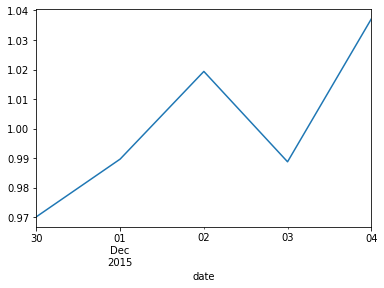

In [170]:
date_series.plot()

In [195]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [182]:
?graphviz

In [217]:
data_test['date'] = data_test['date'].apply(str)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
data_dummy = pd.get_dummies(data_test)

In [219]:
train_cols = data_dummy.drop(['test', 'conversion'], axis=1)

In [220]:
clf=DecisionTreeClassifier(
    #change weights. Our data set is now perfectly balanced. It makes easier to understand the tree output
    class_weight="balanced",
    #only split if if it's worthwhile. The default value of 0 means always split no matter what if you can increase overall performance, which creates tons of noisy and irrelevant splits
    min_impurity_decrease = 0.001, max_depth = 2
    )
clf.fit(train_cols,data_dummy['test'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [214]:
# export_graphviz(tree, out_file="tree_test.dot", feature_names=train_cols.columns, proportion=True, rotate=True)
# with open("tree_test.dot") as f:
#     dot_graph = f.read()
# s = Source.from_file("tree_test.dot")
# s.view()

[Text(200.88000000000002, 181.2, 'country_Argentina <= 0.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = 1'),
 Text(133.92000000000002, 108.72, 'country_Uruguay <= 0.5\ngini = 0.498\nsamples = 88.3%\nvalue = [0.535, 0.465]\nclass = 0'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.497\nsamples = 87.3%\nvalue = [0.539, 0.461]\nclass = 0'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.204\nsamples = 1.0%\nvalue = [0.115, 0.885]\nclass = 1'),
 Text(267.84000000000003, 108.72, 'gini = 0.35\nsamples = 11.7%\nvalue = [0.226, 0.774]\nclass = 1')]

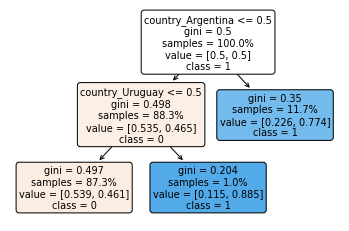

In [229]:
tree.plot_tree(clf, feature_names = train_cols.columns, class_names = ['0','1'], proportion=True, rotate=True, 
               rounded = True, impurity = True, label = 'all', filled = True)

In [228]:
?tree.plot_tree